## Enunciado

>Considere el proyecto cuya información se adjunta.
> 1. Determine para cada actividad su duración optimista. ¿Influye esta duración optimista en la duración mínima del proyecto?
> 2. Determine duración media del proyecto y su varianza utilizando para ello la aproximación del teorema del límite central.
> 3. Determine la probabilidad de que el proyecto se termine antes de 10 periodos.
> 4. Planifique el proyecto teniendo en cuenta que durante las primeras tres semanas dispondrá de cuatro trabajadores y a partir de la cuarta de seis trabajadores.
> 5. ¿Sería suficiente disponer de 4 recursos durante todo el proyecto? ¿Por qué?



In [1]:
# Alargamos el ancho de las celdas al 100%
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import pandas as pd
import numpy as np

datos_enunciado = pd.DataFrame([
#  actividad, precedentes, duracion, duracion_pesimista, duracion_modal, recursos
     ('A',       '---  ',     2,         2,                    2,           1        ),
     ('B',       'A    ',     2,         3,                    2,           2        ),  
     ('C',       'B    ',     3,         4,                    3,           2        ),
     ('D',       'B,J  ',     4,         5,                 17/4,           1        ),
     ('E',       'F,B,J',     1,         1,                    1,           1        ), 
     ('F',       'A    ',     2,         3,                    2,           2        ),
     ('G',       'C,D  ',     1,         1,                    1,           1        ),
     ('H',       'E    ',     4,         5,                    4,           1        ),
     ('I',       'B,J  ',     1,         1,                    1,           1        ),
     ('J',       'A    ',     2,         2,                    2,           1        ),
] ,columns=['actividad', 'precedentes', 'duracion', 'duracion_pesimista', 'duracion_modal', 'recursos']).set_index('actividad')

datos_enunciado

,precedentes,duracion,duracion_pesimista,duracion_modal,recursos
actividad,,,,,
A,---,2,2,2.00,1
B,A,2,3,2.00,2
C,B,3,4,3.00,2
D,"B,J",4,5,4.25,1
E,"F,B,J",1,1,1.00,1
F,A,2,3,2.00,2
G,"C,D",1,1,1.00,1
H,E,4,5,4.00,1
I,"B,J",1,1,1.00,1


## Solución
### Apartado 1

> Determine para cada actividad su duración optimista. ¿Influye esta duración optimista en la duración tope del proyecto?


A partir de los datos del enunciado y de la relación $D=\frac{a+4m+b}{6}$ obtenemos la duración optimista $a=6D-b-4m$.

In [2]:
datos_proyecto =  datos_enunciado.copy()
datos_proyecto['duracion_optimista'] = datos_proyecto.eval('6*duracion - duracion_pesimista - 4*duracion_modal')
datos_proyecto

,precedentes,duracion,duracion_pesimista,duracion_modal,recursos,duracion_optimista
actividad,,,,,,
A,---,2,2,2.00,1,2.0
B,A,2,3,2.00,2,1.0
C,B,3,4,3.00,2,2.0
D,"B,J",4,5,4.25,1,2.0
E,"F,B,J",1,1,1.00,1,1.0
F,A,2,3,2.00,2,1.0
G,"C,D",1,1,1.00,1,1.0
H,E,4,5,4.00,1,3.0
I,"B,J",1,1,1.00,1,1.0


### Apartado 2
> Determine duración media del proyecto y su varianza utilizando para ello la aproximación del teorema del límite central.


#### Duración media del proyecto

En pmule (project management at ULE) está el código que utilizamos para calcular los valores del PERT.

In [3]:
from pmule import calcula_encadenamientos, GrafoProyecto

In [4]:
calcula_encadenamientos(datos_enunciado.precedentes)

actividad,A,B,C,D,E,F,G,H,I,J
actividad,,,,,,,,,,
A,,,,,,,,,,
B,True,,,,,,,,,
C,,True,,,,,,,,
D,,True,,,,,,,,True
E,,True,,,,True,,,,True
F,True,,,,,,,,,
G,,,True,True,,,,,,
H,,,,,True,,,,,
I,,True,,,,,,,,True


La clase PertGraph permite visualizar el grafo PERT, el diagrama de Gantt así como realizar el cálculo de tiempos tempranos, tardíos y de las holguras totales.

In [5]:
aristas = pd.DataFrame([
# actividad, nodo_inicial, nodo_final
  (  'A', 1, 2 ),
  (  'B', 2, 3 ),
  (  'C', 3, 6 ),
  (  'D', 4, 6 ),
  (  'E', 5, 7 ),
  (  'F', 2, 5 ),
  (  'G', 6, 8 ),
  (  'H', 7, 8 ),
  (  'I', 4, 8 ),
  (  'J', 2, 4 ),
  ( 'f1', 3, 4 ),
  ( 'f2', 4, 5 ),   

] ,columns=['actividad', 'nodo_inicial', 'nodo_final']).set_index('actividad')

datos_proyecto = pd.concat([datos_proyecto, aristas], axis=1, sort=False).set_index(aristas.index).fillna(0)
datos_proyecto

,precedentes,duracion,duracion_pesimista,duracion_modal,recursos,duracion_optimista,nodo_inicial,nodo_final
actividad,,,,,,,,
A,---,2.0,2.0,2.00,1.0,2.0,1,2
B,A,2.0,3.0,2.00,2.0,1.0,2,3
C,B,3.0,4.0,3.00,2.0,2.0,3,6
D,"B,J",4.0,5.0,4.25,1.0,2.0,4,6
E,"F,B,J",1.0,1.0,1.00,1.0,1.0,5,7
F,A,2.0,3.0,2.00,2.0,1.0,2,5
G,"C,D",1.0,1.0,1.00,1.0,1.0,6,8
H,E,4.0,5.0,4.00,1.0,3.0,7,8
I,"B,J",1.0,1.0,1.00,1.0,1.0,4,8


La varianza de cada actividad no es aportada por el enunciado como dato, pero sí se puede calcular a partir de la expresión $\sigma^2 = \left(\frac{b-a}{6} \right)$

In [6]:
datos_proyecto['varianza'] = datos_proyecto.eval('((duracion_pesimista - duracion_optimista)/6)**2')
datos_proyecto[['duracion_pesimista', 'duracion_optimista', 'varianza']]

,duracion_pesimista,duracion_optimista,varianza
actividad,,,
A,2.0,2.0,0.000000
B,3.0,1.0,0.111111
C,4.0,2.0,0.111111
D,5.0,2.0,0.250000
E,1.0,1.0,0.000000
F,3.0,1.0,0.111111
G,1.0,1.0,0.000000
H,5.0,3.0,0.111111
I,1.0,1.0,0.000000


##### Grafo PERT con numeración de nodos

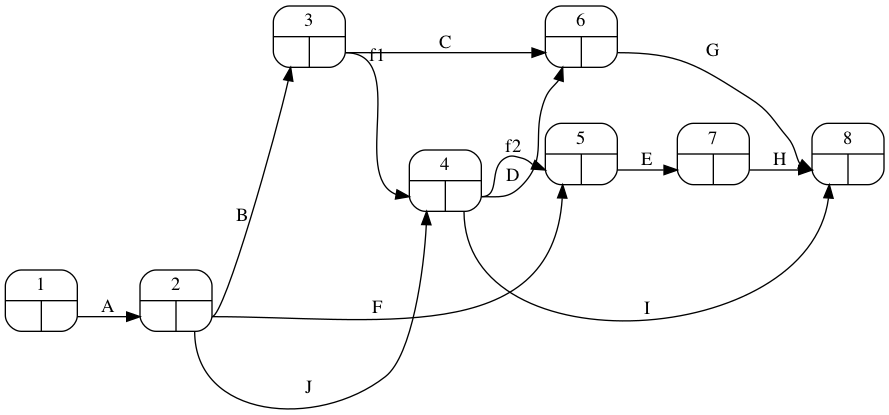

In [7]:
proyecto = GrafoProyecto(datos_proyecto)
proyecto.pert('pert_nodos.png', duraciones=False)

##### Matriz de Zaderenko 

In [8]:
proyecto.resolver_zaderenko()

,1,2,3,4,5,6,7,8,temprano
1,,2,,,,,,,0
2,,,2,2,2,,,,2
3,,,,0,,3,,,4
4,,,,,0,4,,1,4
5,,,,,,,1,,4
6,,,,,,,,1,8
7,,,,,,,,4,5
8,,,,,,,,,9
tardios,0,2,4,4,4,8,5,9,


In [9]:
resultados_pert = proyecto.calcula_pert()
resultados_pert['nodos']

,tempranos,tardios
1,0.0,0.0
2,2.0,2.0
3,4.0,4.0
4,4.0,4.0
5,4.0,4.0
7,5.0,5.0
6,8.0,8.0
8,9.0,9.0


La duración media del proyecto es:

In [10]:
duracion_media_proyecto = proyecto.duracion_proyecto()
duracion_media_proyecto

9.0

#### Varianza de la duración del proyecto
Para determinar la varianza de la duración del proyecto es necesario determinar la varianza de cada rama del camino crítico.

##### Holguras

In [11]:
resultados_pert['actividades'][['H_total']]

,H_total
A,0.0
B,0.0
F,0.0
J,0.0
C,1.0
f1,0.0
D,0.0
I,4.0
f2,0.0
E,0.0


##### Camino crítico

In [12]:
camino_critico = proyecto.camino_critico(datos_proyecto['duracion'])
camino_critico

Index(['A', 'B', 'F', 'J', 'f1', 'D', 'f2', 'E', 'G', 'H'], dtype='object')

##### Grafo PERT con indicación del camino crítico

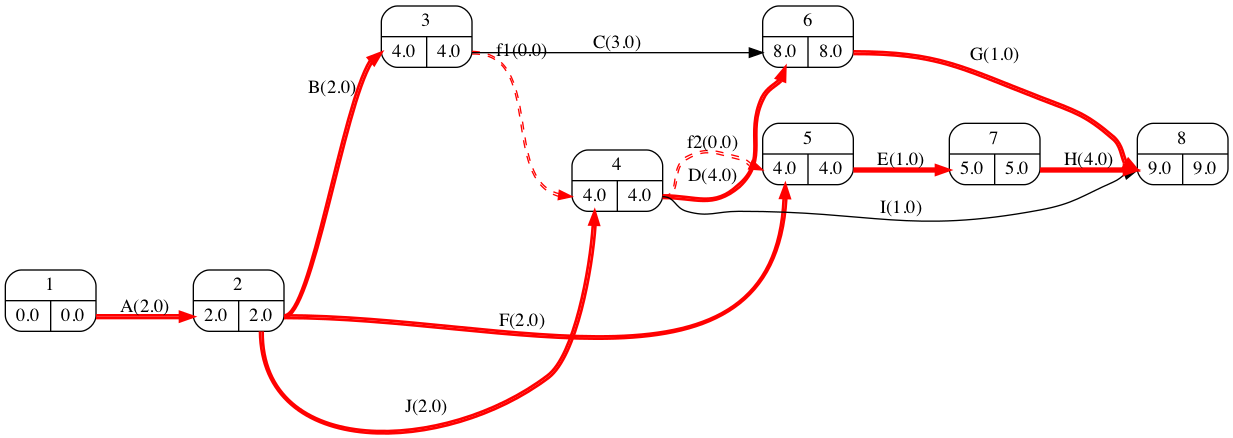

In [13]:
proyecto.pert('pert_tiempos_apartado_1.png')

##### Varianza de cada actividad

A la vista del grafo PERT el camino crítico se compone de 5 ramas.

In [14]:
rama_1 = ['A', 'F', 'E', 'H']
rama_2 = ['A', 'J', 'f2', 'E', 'H']
rama_3 = ['A', 'J', 'D', 'G']
rama_4 = ['A', 'B', 'f1', 'f2', 'E', 'H']
rama_5 = ['A', 'B', 'f1', 'D', 'G']

In [15]:
desviacion_proyecto = proyecto.desviacion_proyecto(rama_1, rama_2, rama_3, rama_4, rama_5)

Desviación rama: A-F-E-H : 0.4714045207910317
Desviación rama: A-J-f2-E-H : 0.3333333333333333
Desviación rama: A-J-D-G : 0.5
Desviación rama: A-B-f1-f2-E-H : 0.4714045207910317
Desviación rama: A-B-f1-D-G : 0.6009252125773316
Varianza del proyecto: 0.3611111111111111
Desviación del proyecto: 0.6009252125773316


### Apartado 3
> Determine la probabilidad de que el proyecto se termine antes de 10 periodos.



In [16]:
import scipy
from scipy.stats import norm

probabilidad_de_terminar_antes_de_10 = norm.cdf(10, loc=duracion_media_proyecto, scale=desviacion_proyecto)
probabilidad_de_terminar_antes_de_10 * 100

95.19538352721634

### Apartado 4
> Planifique el proyecto teniendo en cuenta que durante las primeras tres semanas dispondrá de cuatro trabajadores y a partir de la cuarta de seis trabajadores.


#### Análisis de la situación inicial

Para responder este apartado es necesario representar la demanda de recursos a lo largo del tiempo.

In [17]:
proyecto_asignacion = proyecto.copy()
gantt_asignacion = proyecto_asignacion.gantt(representar = 'recursos', total='fila', holguras = True)
gantt_asignacion

,1,2,3,4,5,6,7,8,9,H_total
A,1,1,,,,,,,,0
B,,,2,2,,,,,,0
C,,,,,2,2,2,,,1
D,,,,,1,1,1,1,,0
E,,,,,1,,,,,0
F,,,2,2,,,,,,0
G,,,,,,,,,1,0
H,,,,,,1,1,1,1,0
I,,,,,1,,,,,4
J,,,1,1,,,,,,0


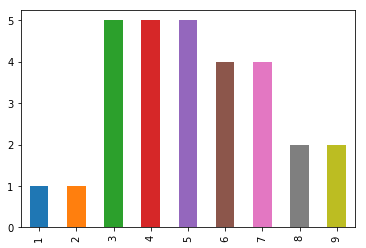

In [18]:
(gantt_asignacion.data.loc['Total'].drop('H_total').plot(kind='bar'));

La demanda de recursos actual infringe el límite impuesto en el enunciado. Es necesario aplicar el algoritmo de asignación.

#### Reprogramación del proyecto utilizando el algoritmo de asignación

 El primer periodo problemático es el 3.

##### Asignación periodo 3

Las tres actividades programadas para el periodo 3 son críticas y de la misma duración. Al disponer de 4 recursos máximo se programan las actividades B y F desplazando la J.

In [19]:
proyecto_asignacion.desplazar(J = 1, mostrar='recursos')

,1,2,3,4,5,6,7,8,9,10,H_total
A,1,1,,,,,,,,,0
B,,,2,2,,,,,,,1
C,,,,,2,2,2,,,,2
D,,,,,,1,1,1,1,,0
E,,,,,,1,,,,,0
F,,,2,2,,,,,,,1
G,,,,,,,,,,1,0
H,,,,,,,1,1,1,1,0
I,,,,,,1,,,,,4
J,,,,1,1,,,,,,0


La actividad *slide_J* representa el desplazamiento de las actividad J.

En estas condiciones el proyecto ya es compatible con las restricciones impuestas a los recursos.

### Apartado 5
> ¿Sería suficiente disponer de 4 recursos durante todo el proyecto? ¿Por qué?

En la programación resultante del apartado anterior los cuatro recursos no serían suficientes pues hay periodos que demandan 5 recursos. Se analiza la posibilidad de reprogramar el proyecto atendiendo a este nuevo límite.

#### Reprogramación del proyecto utilizando el algoritmo de asignación

 El primer periodo problemático es el 4.

##### Asignación periodo 4

Las tres actividades programadas para el periodo 4 son críticas y de la misma duración. Sin embargo las actividades y B y F ya han comenzado su ejecución y se opta por no interrumpirlas. Se desplaza por tanto la J.

In [20]:
proyecto_asignacion.desplazar(J = 1, mostrar='recursos')

,1,2,3,4,5,6,7,8,9,10,11,H_total
A,1,1,,,,,,,,,,0
B,,,2,2,,,,,,,,2
C,,,,,2,2,2,,,,,3
D,,,,,,,1,1,1,1,,0
E,,,,,,,1,,,,,0
F,,,2,2,,,,,,,,2
G,,,,,,,,,,,1,0
H,,,,,,,,1,1,1,1,0
I,,,,,,,1,,,,,4
J,,,,,1,1,,,,,,0


El siguiente periodo conflictivo sería el 7.

##### Asignación periodo 7

Las D y E son críticas. Entre ambas consumen dos recursos. De las dos actividades no críticas se opta por desplazar la I por ser la de mayor holgura. La actividad C es posible programarla para este periodo al consumir otros dos recurssos.

In [21]:
proyecto_asignacion.desplazar(I = 1, mostrar='recursos')

,1,2,3,4,5,6,7,8,9,10,11,H_total
A,1,1,,,,,,,,,,0
B,,,2,2,,,,,,,,2
C,,,,,2,2,2,,,,,3
D,,,,,,,1,1,1,1,,0
E,,,,,,,1,,,,,0
F,,,2,2,,,,,,,,2
G,,,,,,,,,,,1,0
H,,,,,,,,1,1,1,1,0
I,,,,,,,,1,,,,3
J,,,,,1,1,,,,,,0


En estas condiciones el proyecto ya es viable con 4 recursos. No obstante su duración se ha prolongado hasta 11 periodos.